## 기계학습 및 실습 2024년 2학기 중간과제
### 타이타닉 데이터셋 분석
#### 2023100978 송주빈



#### 사용할 데이터 셋 : 타이타닉 
##### 실습환경 주피터 노트북 

### 라이브러리 import

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as alt
from sklearn import preprocessing
import matplotlib.pyplot as plt
df_train=pd.read_csv("./data/train.csv",index_col="PassengerId") # 트레인 데이터셋
df_test=pd.read_csv("./data/test.csv",index_col="PassengerId") # test dataset 
##from sklearn.model_selection import train_test_split #데이터를 

### 데이터 구조 확인

In [260]:
#데이터 샘플 확인
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [262]:
#데이터 dimension ( 행과 열 ) 확인
df_train.shape

(891, 11)

In [264]:
#데이터의 개략적인 정보 확인 
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [266]:
df_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [268]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [270]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature(파생변수, 독립변수)와 Label (Target, 목적변수, 종속변수)확인 
##### 타이타닉 학습용 데이터 ( 이하 df_train)에서 최종적으로 예측해야 할 변수는 'Survived' 필드이다. 본 과정에서는 이를 Label이라 지칭하며 Target, 목적 변수, 종속변수라고도 한다.'Survived'를 제외한 나머지 필드는 ML 모델에 사용될 Feature로 활용한다(파생변수, 독립변수라고도 한다) 

#### Survived의 구성 요소 값 0,1에 대해서는 데이터 description을 참고하여 의미를 확실히 하도록한다.0 사망, 1 생존

In [272]:
#구성 값 확인
df_train['Survived'].unique()

array([0, 1], dtype=int64)

In [274]:
#value_count() 는 Series의 unique value를 count 해주는 함수
df_train['Survived'].value_counts() 

Survived
0    549
1    342
Name: count, dtype: int64

In [276]:
#value_counts() 결과 값을 percent 정보로 변환
(df_train['Survived'].value_counts()/len(df_train)*100).round(2)

Survived
0    61.62
1    38.38
Name: count, dtype: float64

### 각 Feature에 대하여 다양한 전처리기 기법을 활용해 학습 데이터 준비

### 결측치 확인

In [278]:
#결측치 확인
#df_train.isnull().sum() #결측치의 수수
df_train.isnull().mean()*100 #결측치를 percentage로 확인

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

### 결측치 처리 
#### 결측치가 0.2%인 (2건인)embarked 부터 값 구성 확인

In [280]:
#결측치 처리 - embarked
#가장 많이 나온 데이터로 대체
#value_counts 는 unique값들의 count를 보여주는데, idxmax()로 그 중 가장 많이 나온 데이터를 반환
replace_value = df_train['Embarked'].value_counts(dropna=False).idxmax()
replace_value

'S'

In [282]:
#결측치 처리 (대체) - embarked
df_train['Embarked'] = df_train['Embarked'].fillna(replace_value)

#### 결측치 처리 - age
##### 약 20%의 결측치를 가지는 'age' 필드의 경우 가장 가까운 다른 승객정보로 대체를 시도한다. 회귀 계열의 ML모델을 통해 예측하는 것은 과할 수 있기에 상관관계가 높은 변수로 정렬한 후 앞/뒤의 값을 대체 한다. 

In [284]:
# 결측치 처리 - age
# 추후 age가 결축치인 데이터를 필터링 하여 추가분석 할 수 있도록 Column 생성 
df_train['Age_isna'] = df_train['Age'].isna().astype(int)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_isna
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


In [286]:
#결츨치  처리 - age
#평균값으로 대체 (mode, median 값 등을 사용할 수도 있음)
replace_value = df_train['Age'].mean().round(2) # age 열의 평균 계산후 소수점 둘 쨰 자리까지 반 올림
replace_value # age 열 평균 값 29.7세이다.

29.7

In [288]:
#결측치 처리 (대체) - age
df_train['Age'] = df_train['Age'].fillna(replace_value) #Age열에서 결측값 NaN인 부분을 replace_value 변수에 저장된 값으로 대체 여기서는 29.7이 된다.

### 결측치 처리 - Cabin
##### 결측치가 77.1%나 되는 Cabin(객실번호) 필드의 경우 Cabin 값이 결측된 데이터를 모두 분석해서 제외할지 vs 대체하여 사용할지 vs 해당 필드를 feature에서 제거할지 결정해야한다.

In [290]:
#결측치 처리 - Cabin
df_cabin_notnull = df_train.dropna(subset = ['Cabin'])
for pclass in range(1,4):
    cabin_values = df_cabin_notnull [df_cabin_notnull['Pclass']==pclass]['Cabin'].sort_values().values
    print("Pclass {}에 해당하는 Cabin의 값 : {}\n".format(pclass, cabin_values))

Pclass 1에 해당하는 Cabin의 값 : ['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B18' 'B19' 'B20' 'B20' 'B22' 'B22'
 'B28' 'B28' 'B3' 'B30' 'B35' 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42'
 'B49' 'B49' 'B5' 'B5' 'B50' 'B51 B53 B55' 'B51 B53 B55' 'B57 B59 B63 B66'
 'B57 B59 B63 B66' 'B58 B60' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B77' 'B78'
 'B79' 'B80' 'B82 B84' 'B86' 'B94' 'B96 B98' 'B96 B98' 'B96 B98' 'B96 B98'
 'C101' 'C103' 'C104' 'C106' 'C110' 'C111' 'C118' 'C123' 'C123' 'C124'
 'C124' 'C125' 'C125' 'C126' 'C126' 'C128' 'C148' 'C2' 'C2' 'C22 C26'
 'C22 C26' 'C22 C26' 'C23 C25 C27' 'C23 C25 C27' 'C23 C25 C27'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C52' 'C54'
 'C62 C64' 'C65' 'C65' 'C68' 'C68' 'C7' 'C70' 'C78' 'C78' 'C82' 'C83'
 'C83' 'C85' 'C86' 'C87' 'C90' 'C91' 'C92' 'C92' 'C93' 'C93' 'C95' 'C99'
 'D10 D12' 'D11' 'D15' 'D17' 'D17' 'D19' 'D20' 'D20' 'D21' 'D26' 'D26'
 'D28' 'D30' 'D33' 'D33' 'D35' 'D35' 'D3

##### cain의 실제 데이터를 살펴보면 객실 번호 자체가 모델 성능에 결정적인 영향을 미치지 않을 것으로 보인다. Pclass(등실의 등급)과 관련이 있을 것으로 추정되어 Cabin 필드를 분석 대상에서 제외 pclass정보를 활용하는 것이 나을 것 같다는 결론이다.

In [292]:
#결측치 처리 (해당 feature 분석에서 제외 ) -cabin
df_train = df_train.drop(columns=['Cabin'])

In [294]:
#결측치 처리 확인
df_train.isnull().sum()
#age - 평균 값으로 결측치가 대체됨
#embarked - 가장 빈도 높은 값으로 결측치가 대체됨

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age_isna    0
dtype: int64

### 이상값 처리
##### 이상값 확인 전에 cardinality가 상대적으로 낮고, (unique 값이 많지 않고), 정규분포를 따르지 않는 것으로 파악되는 변수 age, sex,sibsp,parch에대해서 살펴본다

In [296]:
#Pcalss(등급) unique값
df_train['Pclass'].value_counts().sort_index() # 등급별 승객수

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [298]:
#sex(성별) unique 값
df_train['Sex'].value_counts().sort_index() # 여성보다 남성이 더 많다.

Sex
female    314
male      577
Name: count, dtype: int64

In [300]:
#SibSp(함께 탑승한 형제, 자매, 아내, 남편의 수) unique값 
df_train['SibSp'].value_counts().sort_index() # 형제 자매나 배우자가 함께 탑승하지 않은 고객이 가장 많다.

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

In [302]:
#Parch(함께 탑승한 부모, 자식의 수 ) unique 값
df_train['Parch'].value_counts().sort_index() #위와 비슷하게 부모나 자녀가 함께 탑승하지 않은 승객이 가장 많고, 부모나 자녀가 1명 함께 탑승한 승객이 그 다음으로 많다.

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

#### 다른 승객보다 함께 탑승한 형제, 자매/부모, 자식의 수가 많은(z-score기분 threshold에서 벗어나는) 승객이 존재하거나 수집 당시 오류가 있었다고 볼 근거가 없으므로, 정상치로 취급한다.
##### Z-Score는 각 데이터 포인트가 평균에서 얼마나 떨어져 있는지를 표준 편차로 나타낸 값이다. 데이터 분석에서 Z-Score가 특정 임계치(예: ±3)를 벗어나는 값은 종종 비정상치로 간주다.
##### 여기서는 SibSp나 Parch 값이 평균에서 많이 벗어난다고 해서 오류로 간주하지 않는다는 의미이다.
### 정상치로 취급한다

##### 일반적인 경우, 데이터가 특정 기준(Z-Score 임계값)을 벗어나면 해당 데이터를 비정상치로 보고 수정하거나 제거하는 것이 보통다다
##### 하지만 여기서는 큰 가족이 함께 탑승한 경우도 있을 수 있으며, 이는 수집 과정에서 오류가 발생한 것이 아니므로 정상 데이터로 본다는 의미이다.

#### 연속형 실수 값을 가지는'Fare'가 이상치를 가지는지 살펴보자 (age는 결측처릴 했기 때문에 따로 확인하지 않는다)

([<matplotlib.axis.XTick at 0x293fd8cea20>], [Text(1, 0, 'Fare')])

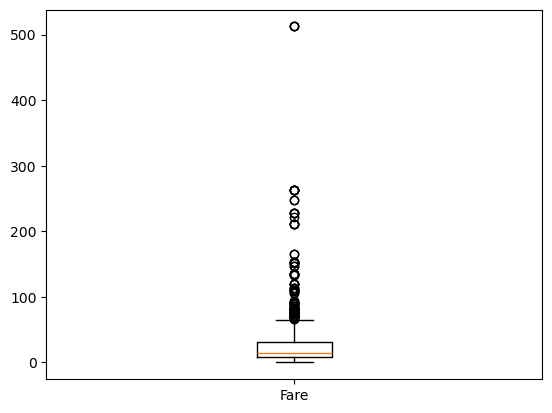

In [304]:
#Fare 값 BoxPlot으로 확인
plt.boxplot(df_train['Fare'])
plt.xticks([1],['Fare'])

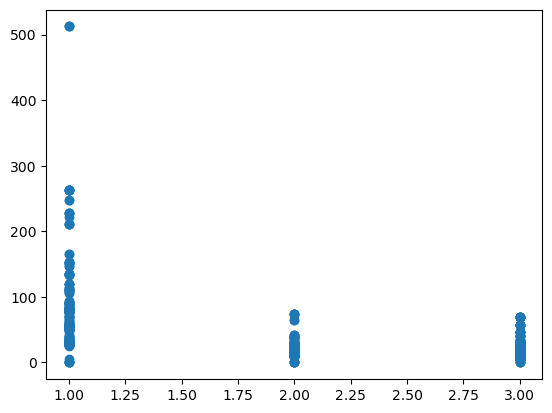

In [306]:
#Fare 데이터 자세히 들여다보기 - Pclass별로
plt.scatter(df_train['Pclass'],df_train['Fare']) # 산점도 그래프 x축에 Pclass 열의 값을 y축에 Fare열의 값을 배치하여 각 승객의 Pclass와 Fare 사이의 관계를 보여준다.
#1등급은 Fare(요금)이 높은 값으로 많이 분포하고, 3등급은 요금이 낮은값에 더 많이 분포하는 경향이다. 

In [308]:
#Fare 데이터 자세히 들여다보기 - 실제 샘플 확인
df_train.sort_values(by=['Fare'], ascending=False).head(5)
# Fare가 가장 높은 5명의 데이터 출력

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,0
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,0
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,0
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,0


#### 코드의 목적
##### 이 코드는 Fare가 높은 상위 승객 데이터를 확인하여, 가장 비싼 요금을 지불한 승객이 어떤 객실 등급을 이용했는지, 승객의 인적 사항, 탑승지 등과의 관계를 분석하는 데 유용하다. 이를 통해 상위 요금과 관련된 패턴을 파악할 수 있다.

### 정규화
##### 연속형 실수 값이 가지는 'Age','Fare'에 대해서만 정규화를 적용해본다. 정규화의 경우 학습 데이터 기준으로 생성한 SCaler를 테스트 데이터에 그대로 적용해야 하는 것에 주의 해야한다.
##### Age와 Fare 열에만 정규화를 적용하고, 학습 데이터로 생성한 스케일러를 테스트 데이터에도 동일하게 적용해야 한다. 이를 통해 학습 데이터와 테스트 데이터가 동일한 기준으로 정규화되므로, 모델이 두 데이터셋을 일관성 있게 처리할 수 있다.

In [318]:
from sklearn import preprocessing

# Age와 Fare 열에 대해 Z-Score 정규화
columns_to_scale = ['Age', 'Fare']
scaler_train = preprocessing.StandardScaler()

# 테스트 데이터에 적용하기 위해 fit과 transform을 분리하여 사용
scaler_train = scaler_train.fit(df_train[columns_to_scale])
df_train[columns_to_scale] = scaler_train.transform(df_train[columns_to_scale])

df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,-0.592494,1,0,A/5 21171,-0.502445,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638776,1,0,PC 17599,0.786845,C,0
3,1,3,"Heikkinen, Miss. Laina",female,-0.284677,0,0,STON/O2. 3101282,-0.488854,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407912,1,0,113803,0.420730,S,0
5,0,3,"Allen, Mr. William Henry",male,0.407912,0,0,373450,-0.486337,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,-0.207722,0,0,211536,-0.386671,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,-0.823357,0,0,112053,-0.044381,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.000054,1,2,W./C. 6607,-0.176263,S,1


#### 이전 단계에서 Age의 결측값을 평균값으로 대체했기 때문에 Age 열에 결측값이 없다. 따라서 StandardScaler를 사용할 때 NaN이 없어서 문제가 발생하지 않고 정규화가 잘 수행되는 것이다.

### 인코딩 
##### String 형태의 명목형 변수는 많은 ML 알고리즘에서 적절하게 계산되지 않는다. 명목형 변수인'Sex'와 'Embarked'에 대해 OneHot 인코딩을 하여 수치형 벡터로 변환한다.

In [321]:
print(df_train.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age_isna'],
      dtype='object')


In [347]:
#df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)
df_train['Sex_male'] = df_train['Sex_male'].astype(int)
df_train['Embarked_Q'] = df_train['Embarked_Q'].astype(int)
df_train['Embarked_S'] = df_train['Embarked_S'].astype(int)
print(df_train[['Sex_male', 'Embarked_Q', 'Embarked_S']].head())

             Sex_male  Embarked_Q  Embarked_S
PassengerId                                  
1                   1           0           1
2                   0           0           0
3                   0           0           1
4                   0           0           1
5                   1           0           1


##### Cardinality가 높은 Name, Ticket에 대해 feature로 활용할 수 있을지 살펴본다
##### cardinality가 높다는 것은 해당 열에 포함된 고유값(unique values)의 개수가 많다는 것을 의미한다.

In [349]:
print("=== Data Info ===")
print(df_train.info())
print("\n=== Describe Data ===")
print(df_train.describe())
print("\n=== First 5 Rows ===")
print(df_train.head())
print("\n=== Null Values ===")
print(df_train.isnull().sum())
print("\n=== One-Hot Encoded Columns ===")
print(df_train[['Sex_male', 'Embarked_Q', 'Embarked_S']].head())

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Ticket      891 non-null    object 
 7   Fare        891 non-null    float64
 8   Age_isna    891 non-null    int32  
 9   Sex_male    891 non-null    int32  
 10  Embarked_Q  891 non-null    int32  
 11  Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4), object(2)
memory usage: 76.6+ KB
None

=== Describe Data ===
         Survived      Pclass           Age       SibSp       Parch  \
count  891.000000  891.000000  8.910000e+02  891.000000  891.000000   
mean     0.383838    2.308642 -2.791133e-17    0.523008    0.3815

##### 카디널리티가 놓은 name과 ticket을 살펴보겠다.

In [356]:
#Name 데이터 살펴보기
df_train['Name'].sort_values().values[:10]

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem'],
      dtype=object)

In [358]:
df_train['Ticket'].sort_values().values[-10:]

array(['W./C. 6607', 'W./C. 6608', 'W./C. 6608', 'W./C. 6608',
       'W./C. 6608', 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208',
       'WE/P 5735', 'WE/P 5735'], dtype=object)

##### ticket 데이터는 카디널리티가 너무 높고, 분석에 의미 잇게 사용될 것 같지 않아 대상에서 제외하도록 하겠다.
##### Name에 경우도 분석 대상에서 제외하려 했지만,, 데이터를 최대한 활용하는 차원에서 Name에 포함된 호칭(OOO.)부분을 추출해서 활용도를 확인해보겠다.

In [366]:
#Name에 포함된 호칭 추출하여 확인 
#정규표현식은 학습범위를 벗어나므로 결과만을 참고한다.
df_train['Name'].str.extract(r"([A-Za-z]+)\.").value_counts(dropna=False)
#이름에서 Mr.Mrs.,Miss.,Master. 등의 호칭이 추출된다.

0       
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
Name: count, dtype: int64

##### 하지만 Mr,Miss,Mrs 등의 호칭은 sex(성별) 필드에서도 충분히 얻을 수 있는 정보이므로 직업/사회적 지위를 나타내는 호칭을 포함하는 경우 'Name_has_title'이라는 이름으로 Flag를 생성해보겠다.

In [371]:
#이름에 직업/사회적 지위를 나타내는 포함여부를 Flag화 한다.
df_train['Name_has_title'] = df_train['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir', case=False).astype(int)

In [391]:
#Name. Ticket 필드 분석에서 제외 
#df_train = df_train.drop(columns=['Ticket', 'Name'])

In [393]:
print(df_train.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_isna',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Name_has_title'],
      dtype='object')


#### 제거된 Name과 Ticket 

### 산포도 분석
#### 개별 feature에 대한 데이터 탐색을 전처리 과정에서 충분히 살펴보았다. 이제부터는 관심 대상인 Survived 값과의 관계를 탐색해본다

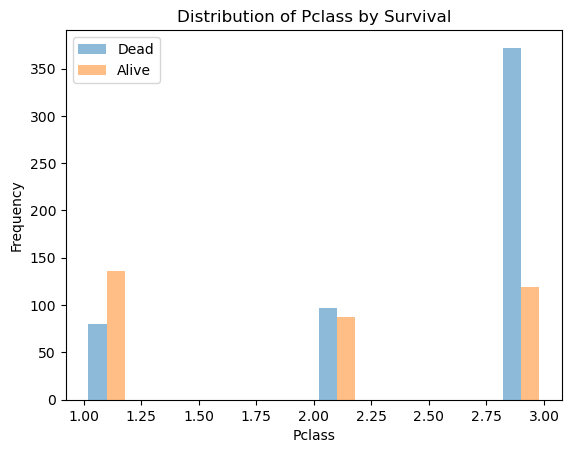

In [402]:
#Pclass에 따른 Survived(사망자 / 생존자 ) 분포
hist1 = df_train[df_train['Survived']==0]['Pclass'] #0은 사망
hist2 = df_train[df_train['Survived']==1]['Pclass'] #1은 생존
plt.hist([hist1,hist2],label=['Dead','Alive'],alpha=0.5)
plt.title('Distribution of Pclass by Survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

plt.legend(loc=0)

##### 중요한 변수로 작용하며, 사회적 계층에 따른 구조 우선순위와 관련된 통찰을 제공합니다.
##### 1등급 승객의 높은 생존율과 3등급 승객의 낮은 생존율을 통해, 당시의 계층 구조가 생존율에 미친 영향을 파악할 수 있습니다.

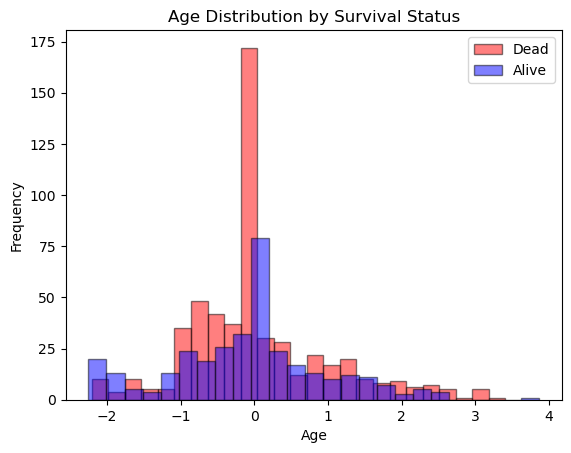

In [410]:
# Survived에 따른 Age 분포
hist1 = df_train[df_train['Survived'] == 0]['Age']  # 0은 사망
hist2 = df_train[df_train['Survived'] == 1]['Age']  # 1은 생존

# 히스토그램 그리기
plt.hist(hist1, label='Dead', bins=25, alpha=0.5, color='red', edgecolor='black')
plt.hist(hist2, label='Alive', bins=25, alpha=0.5, color='blue', edgecolor='black')

# 범례 및 레이블
plt.legend(loc='best')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend(loc=0)

### 어린아이들의 생존율이 상대적으로 높다.
##### 일반적으로 age가 낮은 쪽(어린아이)의 경우, Alive(생존자) 분포가 상대적으로 높게 나타는 경향이 있다. 이는 당시 사고에서 어린아이들이 우선적으로 구명보트에 탑승했을 가능성이 있음을 시사한다.

### 성인 승객의 생존율이 낮다
##### Age가 20~40세 사이의 성인 승객의 경우, Dead(사망자) 분포가 더 높게 나타날 가능성이 크다. 이는 성인 남성이 구조 과정에서 후순위로 밀렸거나, 성인 승객이 많았기 때문에 생존율이 낮았을 수 있음을 시사한다.

### 고령자의 생존율이 낮다
##### Age가 60세 이상인 고령자 구간에서 Dead 분포가 높게 나타난다면, 나이가 많을수록 생존 확률이 낮았음을 의미할 수 있다. 고령자일수록 대피나 구조 과정에서 어려움을 겪었을 가능성도 있다.

In [415]:
#상관관계 계산 
cols_to_corr = ['Pclass','Age','SibSp','Parch','Fare','Name_has_title']
df_train[cols_to_corr].corr().round(2)

,Pclass,Age,SibSp,Parch,Fare,Name_has_title
Pclass,1.00,-0.33,0.08,0.02,-0.55,-0.07
Age,-0.33,1.00,-0.23,-0.18,0.09,-0.14
SibSp,0.08,-0.23,1.00,0.41,0.16,0.20
Parch,0.02,-0.18,0.41,1.00,0.22,0.14
Fare,-0.55,0.09,0.16,0.22,1.00,0.05
Name_has_title,-0.07,-0.14,0.20,0.14,0.05,1.00


([<matplotlib.axis.YTick at 0x29384a7c260>,
 [Text(0, 0.5, 'Survived'),
  Text(0, 1.5, 'Pclass'),
  Text(0, 2.5, 'Age'),
  Text(0, 3.5, 'SibSp'),
  Text(0, 4.5, 'Parch'),
  Text(0, 5.5, 'Fare'),
  Text(0, 6.5, 'Name_has_title')])

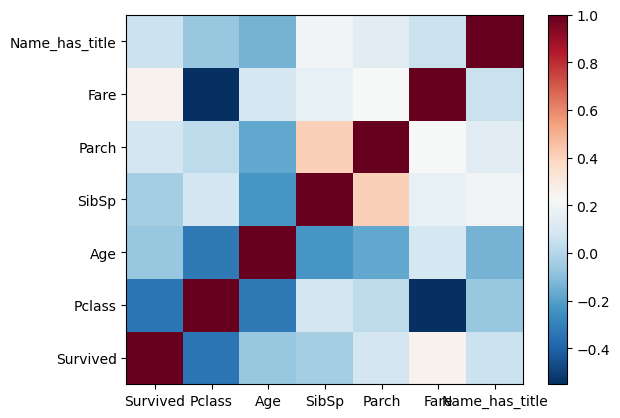

In [440]:
#상관관계 시각화

# 상관관계 계산을 위한 열 선택
cols_to_corr = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title']

fig, ax = plt.subplots(1,1)
c = ax.pcolor(df_train[cols_to_corr].corr().round(2), cmap='RdBu_r')
fig.colorbar(c,ax=ax)
plt.xticks(np.arange(0.5, len(cols_to_corr),1), cols_to_corr)
plt.yticks(np.arange(0.5, len(cols_to_corr),1), cols_to_corr)

##### 상관관계가 높은 변수의 경우 모델링 단계에 있어서 차원축소 등의 의사결정에 활용될 수 있는데, 'Fare'와 'Pclass'가 약한 음의 상관관계 -0.55,'SibSp'와 'Parch'가 약한 양의 상관관계 0.41를 나타내는 것 말고는 특별한 상관관계는 보이지 않는다.

### 전처리 함수 refactoring
##### 훈련 데이터와 테스트 데이터 모두에서 전처리를 수행한다.
###### 결측치 처리 (Embarked, Age) 데이터 정규화 (Age, Fare) One-Hot Encoding (Sex, Embarked)호칭 정보 플래그 생성 (Name_has_title) 불필요한 열 삭제 (Name, Ticket, Cabin)

In [451]:
def part5_preprocessing(df_orig, mode='train', replace_embarked=None, replace_age=None, scaler=None):
    df = df_orig.copy()
    
    # 결측치 처리
    if mode == 'train':
        replace_embarked = df['Embarked'].value_counts(dropna=False).idxmax()
        replace_age = df['Age'].mean().round(2)
    
    df['Embarked'] = df['Embarked'].fillna(replace_embarked)
    df['Age_isna'] = df['Age'].isna().astype(int)
    df['Age'] = df['Age'].fillna(replace_age)

    # 데이터 정규화
    if mode == 'train':
        scaler = preprocessing.StandardScaler()
        scaler = scaler.fit(df[['Age', 'Fare']])
    df[['Age', 'Fare']] = scaler.transform(df[['Age', 'Fare']])

    # 데이터 인코딩
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
    df['Name_has_title'] = df['Name'].str.contains(
        'Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir',
        case=False
    ).astype(int)

    # 불필요한 열 삭제
    df = df.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')

    return df, replace_embarked, replace_age, scaler

### 훈련용 데이터 전처리 (일괄)
#### 공통 함수화 한 커스텀 전처리 함수를 통해 학습 데이터와 테스트 데이터에 동일한 기준으로 전처리를 수행한다.

In [454]:
#학습 데이터 전처리 (일괄적용)
# 데이터 로드
df_train = pd.read_csv('./data/train.csv')  # 훈련 데이터
df_test = pd.read_csv('./data/test.csv')    # 테스트 데이터

# 학습 데이터 전처리
df_train_preprocessed, replace_embarked, replace_age, scaler = part5_preprocessing(df_train, mode='train')

# 테스트 데이터 전처리 (훈련 데이터에서 얻은 값을 적용)
df_test_preprocessed, _, _, _ = part5_preprocessing(
    df_test, mode='test', replace_embarked=replace_embarked, replace_age=replace_age, scaler=scaler
)

### 훈련/ 테스트 데이터 분할
##### 모델 학습 이전에 모델력 검증을 위한 테스트 데이터를 별도 분리해두고 최종 검증에만 사용하는 것이 일반적이나, 본 실습에서는 사전에 이미 분리되어 주어졌으므로 해당 과정을 생략한다.

### Feature(X), Label(y) 분리
##### 지도학습의 경우 학습용 데이터가 Label을 포함하고 있어야 한다. Label이 어떤 필드인지를 지정해주기 위해 데이터에서 Feature와 Label을 분리한다.

In [459]:
#Feature(X), Label(y) 분리
target_col = 'Survived'

# 전처리된 데이터에서 분리
train_y = df_train_preprocessed[target_col]  # Label
train_X = df_train_preprocessed.drop(columns=[target_col])  # Features

train_X = train_X.set_index('PassengerId')

In [463]:
#훈련용/평가요 데이터 분할

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.3, random_state=42)
train_X

,Pclass,Age,SibSp,Parch,Fare,Age_isna,Sex_male,Embarked_Q,Embarked_S,Name_has_title
PassengerId,,,,,,,,,,
446,1,-1.977672,0,2,0.999770,0,True,False,True,1
651,3,0.000054,0,0,-0.489442,1,True,False,True,0
173,3,-2.208535,1,1,-0.424256,0,False,False,True,0
451,2,0.484867,1,2,-0.089684,0,True,False,True,0
315,2,1.023547,1,1,-0.119886,0,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...
107,3,-0.669448,0,0,-0.494391,0,False,False,True,0
271,1,0.000054,0,0,-0.024246,1,True,False,True,0
861,3,0.869639,2,0,-0.364355,0,True,False,True,0


#### 이제 train_X와 train_y를 사용해 모델을 학습시키고, val_X와 val_y를 사용해 모델 성능을 평가할 수 있다.

# 모델링 / 지도학습 - 분류를 위한 모델 
### Losgistic Regression VS SVM VS Random forest 비교

#### Losgistic Regression
##### Logistic Regression은 이진 분류 문제에 적합하며, Titanic 데이터에서 Feature와 생존 여부 간의 관계가 비교적 단순하다는 점에서 적합한 모델이다. 또한, Feature의 중요도를 직관적으로 해석할 수 있고, 예측 결과를 확률로 제공하여 생존 가능성을 정량적으로 평가할 수 있다는 장점이 있다.

In [473]:
#모델 학습 및 예측 
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 생성
model1 = LogisticRegression(C=20, max_iter=1000, random_state=42)

# 모델 학습
model1.fit(train_X, train_y)

LogisticRegression(C=20, max_iter=1000, random_state=42)

#### SVM
##### SVM은 고차원에서 최적의 결정 경계를 찾고, 비선형 관계를 잘 학습할 수 있어 Titanic 데이터의 다양한 Feature와 복잡한 관계를 효과적으로 분류할 수 있다. 또한, 일부 이상치에 덜 민감하고, 적은 데이터에도 안정적인 성능을 보여 Titanic 데이터에 적합하다.

In [479]:
#모델 학습 및 예측
from sklearn.svm import SVC

# SVM 모델 생성 및 학습
model2 = SVC(kernel='linear', probability=True, random_state=42)
model2.fit(train_X, train_y)

SVC(kernel='linear', probability=True, random_state=42)

### Random Forest
##### Random Forest는 여러 결정 트리를 결합해 안정적이고 높은 예측 성능을 제공하며, Titanic 데이터처럼 다양한 Feature 간 상호작용이 있는 데이터에 적합하다. 또한, 자동으로 중요한 Feature를 선택하고, 일부 Feature의 결측치나 노이즈에도 강건하여 정확한 생존 예측을 도와준다.

In [482]:
#모델 학습
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델 생성 및 학습
model3 = RandomForestClassifier(max_depth=3, random_state=42)
model3.fit(train_X, train_y)

RandomForestClassifier(max_depth=3, random_state=42)

### 모델 평가 및 검증

#### 모델 #1 - Logistic Regression 평가 (Validation 데이터 기준)

In [486]:
#모델평가
# 훈련 데이터의 정확도
print("Training Accuracy:", model1.score(train_X, train_y))

# 검증 데이터의 정확도
print("Validation Accuracy:", model1.score(val_X, val_y))

Training Accuracy: 0.8154093097913323
Validation Accuracy: 0.8097014925373134


#### 모델 #2 - SVM (Validation 데이터 기준)

In [489]:
#모델 평가 
# 훈련 데이터의 정확도
print("Training Accuracy:", model2.score(train_X, train_y))

# 검증 데이터의 정확도
print("Validation Accuracy:", model2.score(val_X, val_y))

Training Accuracy: 0.7945425361155698
Validation Accuracy: 0.7910447761194029


#### 모델 #3 - Random Forest(Validation 데이터 기준)

In [492]:
#모델 평가
# 훈련 데이터의 정확도
print("Training Accuracy:", model3.score(train_X, train_y))

# 검증 데이터의 정확도
print("Validation Accuracy:", model3.score(val_X, val_y))

Training Accuracy: 0.8443017656500803
Validation Accuracy: 0.8171641791044776


### 3가지 모델 성능 비교 (ROC Curve Plotting)

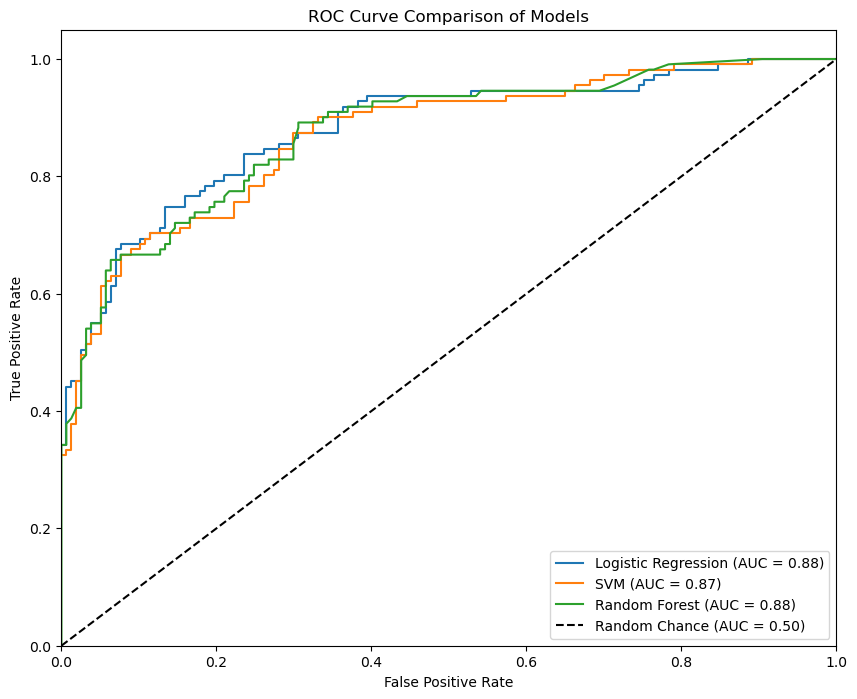

In [500]:
# ROC Curve 플롯
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 각 모델에 대한 ROC Curve를 그리는 함수
def plot_roc_curve(models, model_names, val_X, val_y):
    plt.figure(figsize=(10, 8))
    
    for model, name in zip(models, model_names):
        # 모델의 예측 확률 계산 (양성 클래스의 확률만 사용)
        y_pred_proba = model.predict_proba(val_X)[:, 1]
        
        # ROC Curve와 AUC 계산
        fpr, tpr, _ = roc_curve(val_y, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # ROC Curve 플로팅
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    # 플롯 설정
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison of Models')
    plt.legend(loc="lower right")
    plt.show()

# 모델 목록과 이름 정의
models = [model1, model2, model3]
model_names = ['Logistic Regression', 'SVM', 'Random Forest']

# ROC Curve Plotting
plot_roc_curve(models, model_names, val_X, val_y)

#### 3가지 모델 성능 비교 (AUC Score)

In [504]:
from sklearn.metrics import roc_auc_score

# Function to calculate AUC scores and compare across models
def compare_auc_scores(models, model_names, val_X, val_y):
    auc_scores = {}
    
    for model, name in zip(models, model_names):
        # Predict probabilities for the positive class
        y_pred_proba = model.predict_proba(val_X)[:, 1]
        
        # Calculate AUC score
        auc_score = roc_auc_score(val_y, y_pred_proba)
        auc_scores[name] = auc_score
        print(f"{name} AUC Score: {auc_score:.4f}")
    
    return auc_scores

In [506]:
models = [model1, model2, model3]
model_names = ['Logistic Regression', 'SVM', 'Random Forest']

In [508]:
# Plotting AUC scores for visualization
def plot_auc_scores(auc_scores):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.bar(auc_scores.keys(), auc_scores.values(), color=['blue', 'green', 'red'], alpha=0.7)
    plt.title("AUC Scores Comparison")
    plt.xlabel("Models")
    plt.ylabel("AUC Score")
    plt.ylim(0.0, 1.0)
    for name, score in auc_scores.items():
        plt.text(name, score + 0.02, f"{score:.2f}", ha='center', va='bottom')
    plt.show()

Logistic Regression AUC Score: 0.8800
SVM AUC Score: 0.8704
Random Forest AUC Score: 0.8756


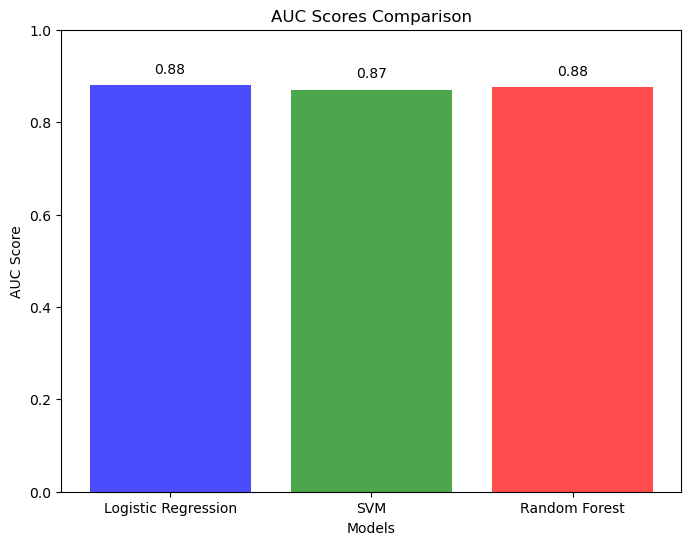

In [516]:
auc_scores = compare_auc_scores(models, model_names, val_X, val_y)
plot_auc_scores(auc_scores)

### 모델 적용 
#### 모델 저장 
##### 간단하게 Pickle 형태로 저장하고 예측이 필요한 시점에 해당 모델을 로드해서 사용하겠다.

In [519]:
import pickle

# 모델 저장
# AUC SCORE 기준 가장 성능이 좋았던 Logistic Regression 모델을 저장한다.
model_save_path = './saved-model.pickle'  # 저장할 경로와 파일 이름

with open(model_save_path, 'wb') as fw:
    pickle.dump(model1, fw)

print(f"Model saved to {model_save_path}")

Model saved to ./saved-model.pickle


In [521]:
# 모델 불러오기
with open(model_save_path, 'rb') as fr:
    loaded_model = pickle.load(fr)

# 불러온 모델 확인
print("Loaded Model:", loaded_model)

Loaded Model: LogisticRegression(C=20, max_iter=1000, random_state=42)


### 테스트용 데이터 전처리

In [524]:
#테스트 데이터 전처리
# 테스트 데이터 로드
df_test = pd.read_csv("./data/test.csv")

# 테스트 데이터 전처리 (훈련 데이터 기준 값 적용)
df_test, _, _, _ = part5_preprocessing(df_test, 'test', replace_embarked, replace_age, scaler)

# 전처리 완료된 데이터 확인
print(df_test.head())

   PassengerId  Pclass       Age  SibSp  Parch      Fare  Age_isna  Sex_male  \
0          892       3  0.369435      0      0 -0.490783         0      True   
1          893       3  1.331365      1      0 -0.507479         0     False   
2          894       2  2.485680      0      0 -0.453367         0      True   
3          895       3 -0.207722      0      0 -0.474005         0      True   
4          896       3 -0.592494      1      1 -0.401017         0     False   

   Embarked_Q  Embarked_S  Name_has_title  
0        True       False               0  
1       False        True               0  
2        True       False               0  
3       False        True               0  
4       False        True               0  


In [526]:
#결측치 처리
#테스트 데이터 중 1건에 'Fare'에 대한 결측치가 존재하므로 결측치를 train 데이터의 평균 값으로 대체한다.
replace_fare = df_train['Fare'].mean().round(2)
df_test['Fare'] = df_test['Fare'].fillna(replace_fare)

# 테스트 데이터에서 PassengerId를 인덱스로 설정
test_X = df_test.set_index('PassengerId')

### 생존율 예측 (테스트용 데이터)

In [529]:
# 모델 예측 수행
pred_y = model1.predict(test_X)  # model1이 Logistic Regression 모델이라고 가정

# 예측 결과를 DataFrame으로 변환
df_result = pd.DataFrame({'PassengerId': test_X.index, 'Survived': pred_y})

# 결과 확인
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### 최종결과 (df_result)
##### PassengerId : 승객 ID(테스트 데이터의 인덱스에서 가져옴)
##### Survived : 모델 예측 결과 (0:사망, 1:생존)

### 예측 결과 CSV 파일로 저장

In [539]:
# 예측 결과를 CSV 파일로 저장
df_result.to_csv('submission.csv', index=False)